In [1]:
import xarray as xr
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def _load_meta(fn, nlines=3):
    meta = {}
    with open(fn) as fh:
        for n in range(3):
            line = fh.readline()
            key, value = line.split(',')
            meta[key.strip().lower()] = value.strip()
    return meta

In [3]:
fn = '/home/earlcd/OneDrive/EUREC4A/EUREC4A-UK/field-campaign/obs/flight331/CCN/CCN 100 data 200124162544.csv'

def load_csv(fn, n_header_lines=3):
    meta = _load_meta(fn, nlines=n_header_lines)
    df = pd.read_csv(fn, skiprows=n_header_lines)
    # cleanup column names
    df.columns = [s.strip().lower().replace(' ', '_') for s in df.columns]
    # make times into datetimes
    df['time'] = meta['date'] + 'T' + df['time'] + 'Z'
    df['time'] =  pd.to_datetime(df['time'], format='%m/%d/%yT%H:%M:%SZ', utc=True)
    
    ds = xr.Dataset.from_dataframe(df)
    ds = ds.swap_dims(dict(index='time'))
    
    ds.attrs.update(meta)
    
    return ds

ds = load_csv(fn)
ds.attrs

/home/earlcd/anaconda2/envs/py36/lib/python3.7/site-packages/xarray/core/dataset.py:4337: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  data = np.asarray(series).reshape(shape)


{'file:': 'c:\\DMT\\CCN data\\CCN 100 data 200124162544.csv',
 'date': '01/24/20',
 'time': '16:25:44'}

/home/earlcd/anaconda2/envs/py36/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


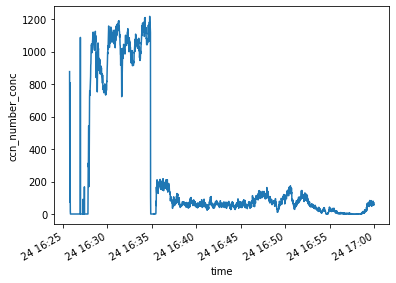

In [4]:
ds.ccn_number_conc.plot()

In [5]:
def load_ccn_data(data_path):
    ds = xr.concat([
        load_csv(fn=fn) for fn in Path(data_path).glob('*.csv')
    ], dim='time')
    return ds

data_path = '/home/earlcd/OneDrive/EUREC4A/EUREC4A-UK/field-campaign/obs/flight331/CCN/'
ds = load_ccn_data(data_path)

(0, 1000)

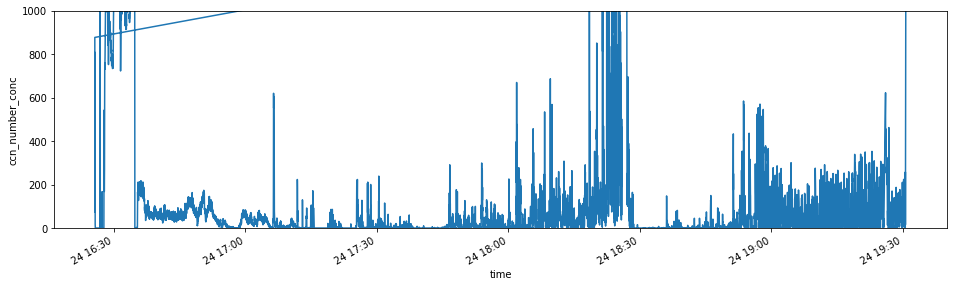

In [6]:
ds.ccn_number_conc.plot(size=4, aspect=4)
plt.gca().set_ylim(0, 1000)

(0, 1000)

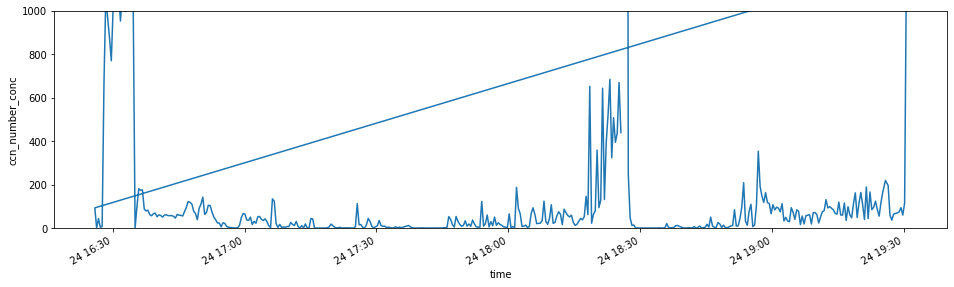

In [14]:
ds.coarsen(dict(time=25), boundary='trim').mean().ccn_number_conc.plot(size=4, aspect=4)
plt.gca().set_ylim(0, 1000)

<xarray.Dataset>
Dimensions:           (time: 10979)
Coordinates:
    index             (time) int64 0 1 2 3 4 5 ... 1549 1550 1551 1552 1553 1554
  * time              (time) datetime64[ns] 2020-01-24T18:26:18 ... 2020-01-24T18:25:55
Data variables:
    current_ss        (time) float64 -0.1158 -0.1158 -0.1158 ... 0.3 0.3 0.3
    temps_stabilized  (time) float64 0.0 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0 1.0
    delta_t           (time) float64 0.0 0.0 0.0 0.0 ... 5.996 5.996 5.996 5.996
    t1_set            (time) float64 38.16 38.16 38.16 ... 29.61 29.61 29.61
    t1_read           (time) float64 29.7 29.62 29.65 ... 29.57 29.57 29.65
    t2_set            (time) float64 38.16 38.16 38.16 38.16 ... 32.6 32.6 32.6
    t2_read           (time) float64 32.57 32.56 32.54 ... 32.6 32.63 32.62
    t3_set            (time) float64 38.16 38.16 38.16 ... 35.18 35.18 35.18
    t3_read           (time) float64 35.06 35.02 35.07 ... 35.21 35.16 35.14
    nafion_set        (time) float64 37.16 37.1